### Load Data

In [10]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np

In [12]:
#Read Air traffc data
df = pd.read_csv('/content/drive/MyDrive/AIML/NLP/Rajeev Sir/Sequential NLP-20210412T100839Z-001.zip (Unzipped Files)/Sequential NLP/Notebooks/2. Time Series with RNN/International-airline-passengers.csv', index_col='Month')
df.sort_index(inplace=True)
df.head()

,Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [13]:
#Number of records
df.shape

(146, 1)

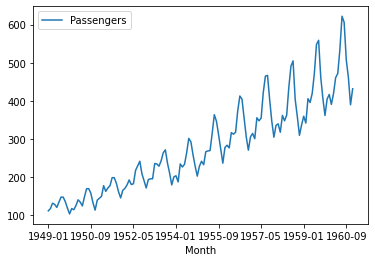

In [14]:
#Plot data
df.plot()

### Data Preprocessing

In [15]:
#Check for null values
df.isnull().sum()

Passengers    2
dtype: int64

In [16]:
#Drop NA
df.dropna(inplace=True)

In [17]:
#Check Data Range
print('Min', np.min(df))
print('Max', np.max(df))

Min Passengers    104.0
dtype: float64
Max Passengers    622.0
dtype: float64


Let's Normalize data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

In [20]:
#Check data now
scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

### Split Data

In [21]:
#First 70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#Last 30% will be used for Test
test_size = len(scaled - train_size)

#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 100
test: 44


In [22]:
#Training data size
train.shape

(100, 1)

### Build Input and Output data
for both Training and Test

In [23]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

In [24]:
#Create Input features and targets
window_size = 12
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

In [25]:
X_train.shape

(88, 12)

In [26]:
X_train[0]

array([0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
       0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
       0.        , 0.02702703])

In [27]:
y_train.shape

(88,)

In [28]:
X_test.shape

(32, 12)

In [29]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
#Check feature shape now for training and test
print(X_train.shape)
print(X_test.shape)

(88, 12, 1)
(32, 12, 1)


### Build the Model

In [31]:
import tensorflow as tf

In [32]:
#Define a model with LSTM layer
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [33]:
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))

In [34]:
model.output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm')>

In [35]:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(X_train, y_train, 
          epochs=200, 
          validation_data=(X_test, y_test), 
          batch_size=32)

Epoch 1/200
3/3 [==============================] - 3s 257ms/step - loss: 0.0809 - val_loss: 0.0412
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0670 - val_loss: 0.0389
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0628 - val_loss: 0.0381
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0623 - val_loss: 0.0393
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0603 - val_loss: 0.0416
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0560 - val_loss: 0.0450
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0526 - val_loss: 0.0487
Epoch 8/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0494 - val_loss: 0.0523
Epoch 9/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0481 - val_loss: 0.0554
Epoch 10/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0452 - val_loss: 0.0575
Epoch 11/200
3/3 [

### Visualize Prediction
For both training and Test Data

In [37]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [38]:
trainPredict[0]

array([0.21776316], dtype=float32)

In [39]:
#Un-normalize the predited data
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [40]:
trainPredict[0]

array([216.80132], dtype=float32)

Display Predicted vs Actual values

In [41]:
import matplotlib.pyplot as plt

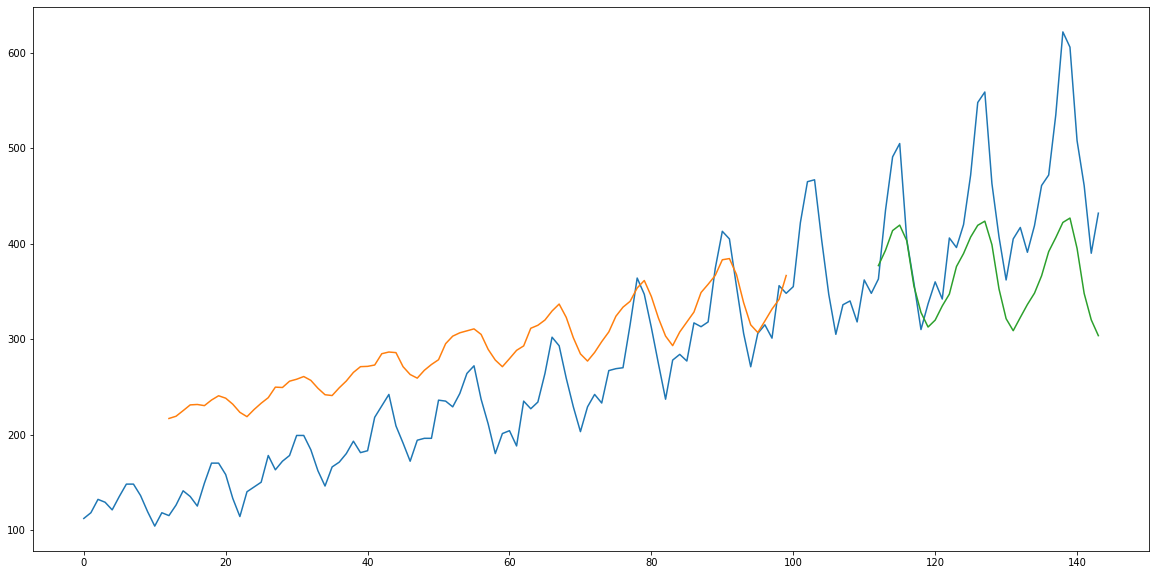

In [42]:
#Shift training prediction by window size
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

#shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled)) #Original
plt.plot(trainPredictPlot) #Prediction on training data
plt.plot(testPredictPlot)  #Prediction on test data
plt.show()

Build model with different window-size to see if it learns better!